## Informasi Mahasiswa 

Nama: Najla Raihana Kamila 

NPM: 2108107010067

## Jenis Dataset 

Pada tugas ini, saya menggunakan dataset https://www.kaggle.com/code/alisonmachadoluiz/boston-house-prices-multiple-regressions/input yang diambil dari Kaggle. Dataset ini berisi 10 kolom dengan jumlah baris sebanyak 506 mengenai data harga rumah di Boston dengan beberapa variabel. 10 kolom yang terdapat di dalam dataset:
1. CRIM : per capita crime rate by town
2. ZN : proportion of residential land zoned for lots over 25.000 sq.ft
3. INDUS : proportion of non-retail business acres per town 
4. CHAS : Charles River dummy variable (=1 if tract bounds river; 0 otherwise)
5. NOX : nitric oxides concentration (parts per 10 million)
6. RM : average number of rooms per dwelling
7. AGE : proportion of owner-occupied units built prior to 1940
8. DIS : weighted distances to five boston employment centres
9. RAD :  index of accessibility to radial highways 
10. TAX :  full-value property-tax rate per $10,000

### Studi Kasus
Pengaruh proporsi lahan bisnis non ritel di sebuah kota terhadap jarak ke pusat pekerjaannya.  

## Import library yang digunakan

In [1]:
# import library yang dibutuhkan 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Gathering Data

In [2]:
# membaca dataset 
data = pd.read_csv('dataset/boston.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Assessing Data

In [3]:
# info tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
# melihat ukuran data
data.size

7084

In [5]:
# mengecek missing value
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
# mengecek duplicate data
duplicate_rows = data[data.duplicated()]

# menampilkan baris duplikasi (jika ada)
if not duplicate_rows.empty:
    print("Duplikasi data ditemukan:")
    print(duplicate_rows)
else:
    print("Tidak ada duplikasi data.")

Tidak ada duplikasi data.


In [7]:
# melihat statistik parameter 
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


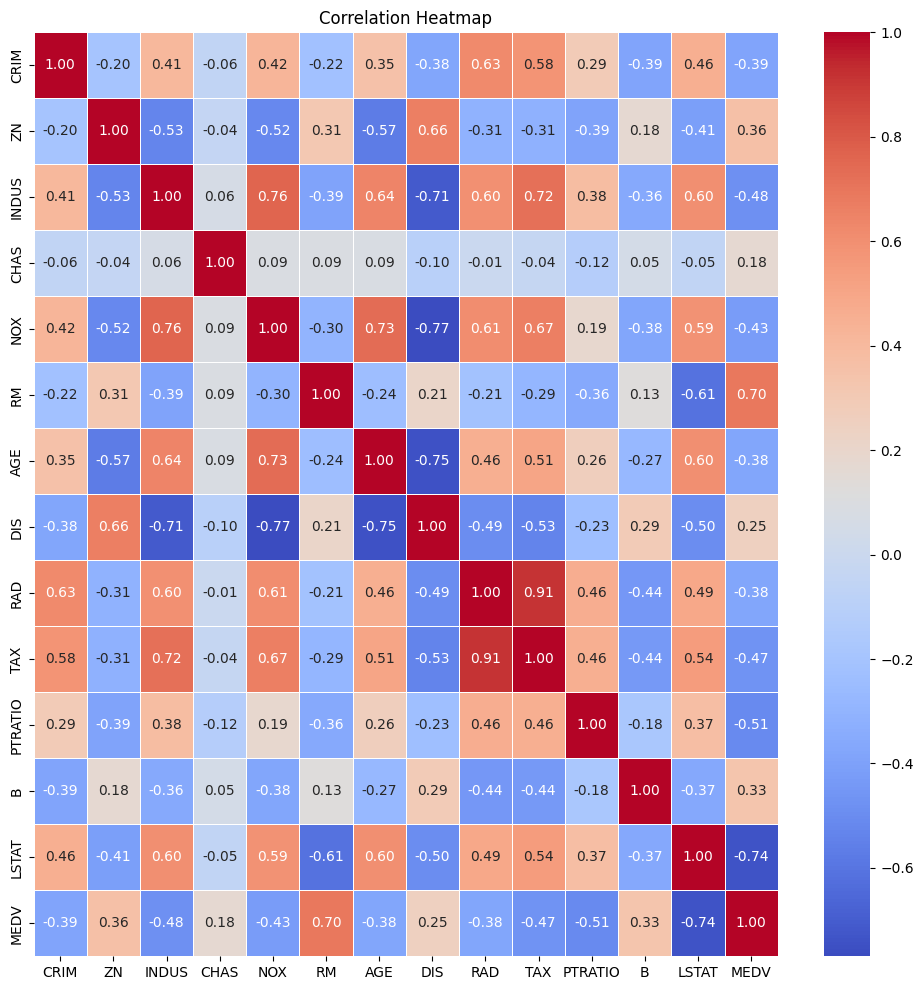

In [8]:
# melihat korelasi antar data
correlation_matrix = data.corr()

# membuat heatmap korelasi
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Pada heatmap korelasi diatas, dapat dilihat bahwa korelasi menggunakan regresi yang dapat dibuat yaitu INDUS dan DIS.  

## Preprocessing data

In [9]:
# memisahkan fitur dan label
X = data['INDUS'].values.reshape(-1, 1) # fitur
Y = data['DIS'].values.reshape(-1, 1) # label 

In [10]:
# melakukan skala fitur sehingga jarak antar data seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # menyimpan data scaler

In [11]:
# melakukan split data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Membangun Model SVM

In [13]:
# membuat dan melatih model 
svr_regression = SVR(kernel='linear')
svr_regression.fit(X_train, y_train)

c:\Users\najla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [14]:
# prediksi model 
y_pred = svr_regression.predict(X_test)
print(y_pred)

[ 5.28502597  4.75001462 -0.08549051  3.75253583  2.09989484  3.29460239
  3.95883258  1.24070288  2.09989484  4.00643952  3.05430068  4.41903302
  2.09989484  3.29460239  4.53011589  2.09989484  0.38831192  2.09989484
  6.09887798  2.09989484  4.62532977  4.75001462  4.3578241   3.49863214
  2.09989484  2.09989484  3.29460239  2.09989484  3.80240977  4.00643952
  5.28502597  4.53011589  2.09989484  2.09989484  2.09989484  1.76437925
  4.6003928   5.02658828  3.80240977  3.75253583  4.00643952  5.70895445
  5.59560459  4.82709253  5.43011379  2.09989484  4.3578241   3.75253583
  2.09989484  5.67948349  4.41903302  5.44824977  4.3578241   4.26261021
  5.30316195  2.09989484  2.09989484  5.08099622  5.18527809  4.87469947
  5.04019027  5.92658619  4.79762156  4.3578241   5.82003732  3.80240977
  2.09989484  5.10139919  5.53439567  2.09989484  4.63666476  2.09989484
  2.09989484  5.77016338  3.29460239  2.09989484  4.26261021  5.59560459
  2.09989484 -0.08549051  4.82709253  2.09989484  5

## Evaluasi Model

In [15]:
# metriks akurasi yang digunakan
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse) # root mean squared error
r2 = r2_score(y_test, y_pred)

# tampilkan hasil metriks 
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 2.026466059580237
Mean Absolute Error (MAE): 1.0266537197797578
Root Mean Squared Error (RMSE): 1.42353997470399
R-squared (R2): 0.4938228455288164


Nilai metriks evaluasi yang digunakan menunjukkan model sangat baik, namun nilai R2-nya masih tergolong sangat rendah. 

## Visualisasi model SVR

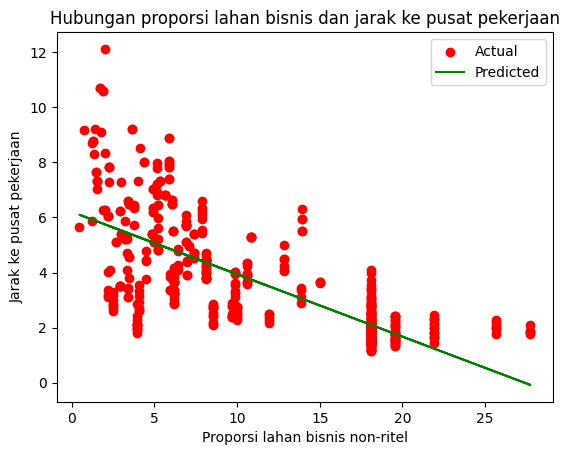

In [16]:
# Menyusun data test dan data prediksi berdasarkan nilai fitur tertentu
sorted_indices = np.argsort(X_test[:, 0])  # Mengurutkan indeks data uji berdasarkan nilai fitur pertama
X_test_sorted = X_test[:, 0][sorted_indices].reshape(-1, 1)  # Mengurutkan data uji berdasarkan nilai fitur pertama
y_pred_sorted = y_pred[sorted_indices]  # Mengurutkan data prediksi sesuai dengan urutan data uji

# plot untuk melihat data test dan data prediksi
plt.scatter(x=X, y=Y, color='red', label='Actual')  # scatter plot untuk data asli (fitur dan label)
plt.plot(X, svr_regression.predict(X), color='green', label='Predicted')  # plot garis untuk menampilkan prediksi dari model SVR
plt.title('Hubungan proporsi lahan bisnis dan jarak ke pusat pekerjaan')
plt.xlabel('Proporsi lahan bisnis non-ritel')
plt.ylabel('Jarak ke pusat pekerjaan')
plt.legend()
plt.show()

Dapat dilihat dari visualisasi SVM menggunakan kernel linear diatas bahwa data dapat dilakukan prediksi regresi. Kesimpulannya yaitu semakin kecil proporsi lahan bisnis non-ritel (bagian dari total lahan daerah digunakan untuk kegiatan bisnis non-ritel), maka semakin jauh pula jarak ke pusat pekerjaan. 